In [57]:
#Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure 

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8) # Adjusts the configurations of the plot we will create.

# Read in the data
movie_df = pd.read_csv(r'C:\Users\sulem\Desktop\MISC\Python\Kaggle DataSets\archive (1)\movies.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sulem\\Desktop\\MISC\\Python\\Kaggle DataSets\\archive (1)\\movies.csv'

In [3]:
#Inspecting the data
movie_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Checking for missing data in the movie dataframe

missing_values = movie_df.isnull().sum()
print(missing_values)


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [5]:
# Inspecting the datatypes for each column
movie_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# In the presence of missing values, we inspect further to understand the nature of the movies dataset.

movie_df.describe(include="all")


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
count,7668,7591,7668,7668.000000,7666,7665.000000,7.665000e+03,7668,7665,7667,7665,5.497000e+03,7.479000e+03,7651,7664.000000
unique,7512,12,19,NaN,3414,NaN,NaN,2949,4535,2814,59,NaN,NaN,2385,NaN
top,Nobody's Fool,R,Comedy,NaN,"February 14, 1986 (United States)",NaN,NaN,Woody Allen,Woody Allen,Nicolas Cage,United States,NaN,NaN,Universal Pictures,NaN
freq,3,3697,2245,NaN,9,NaN,NaN,38,37,43,5475,NaN,NaN,377,NaN
mean,NaN,NaN,NaN,2000.405451,NaN,6.390411,8.810850e+04,NaN,NaN,NaN,NaN,3.558988e+07,7.850054e+07,NaN,107.261613
std,NaN,NaN,NaN,11.153508,NaN,0.968842,1.633238e+05,NaN,NaN,NaN,NaN,4.145730e+07,1.657251e+08,NaN,18.581247
min,NaN,NaN,NaN,1980.000000,NaN,1.900000,7.000000e+00,NaN,NaN,NaN,NaN,3.000000e+03,3.090000e+02,NaN,55.000000
25%,NaN,NaN,NaN,1991.000000,NaN,5.800000,9.100000e+03,NaN,NaN,NaN,NaN,1.000000e+07,4.532056e+06,NaN,95.000000
50%,NaN,NaN,NaN,2000.000000,NaN,6.500000,3.300000e+04,NaN,NaN,NaN,NaN,2.050000e+07,2.020576e+07,NaN,104.000000
75%,NaN,NaN,NaN,2010.000000,NaN,7.100000,9.300000e+04,NaN,NaN,NaN,NaN,4.500000e+07,7.601669e+07,NaN,116.000000


From the information above, the following points can be stated:
1. The budget, gross, score, votes column have the highest frequency of "NaN" values and need to be cleaned.
2. The maximum and minimum values for budget and gross are "$3000/$356,000,000" and "$309/$2,847,246,000" respectively.
3. The genre and rating columns have a robust mix to enable categorization based on movie characteristics.

In [7]:
# Renaming the "gross" column 

movie_df = movie_df.rename({"gross": "gross_revenue"}, axis=1)
print(movie_df.columns)

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross_revenue',
       'company', 'runtime'],
      dtype='object')


In [8]:
#Filling the rows that contain "NaN" values in the gross_revenue and budget columns with their respective means

movie_df["gross_revenue"].fillna(movie_df["gross_revenue"].mean(), inplace=True)

movie_df["budget"].fillna(movie_df["budget"].mean(), inplace=True)

# Drop the rows that contain "NaN" values in the "company" and "rating" columns since the occurence is relatively low

movie_df = movie_df.dropna(subset=['company','rating'])

# View modified dataframe

updated1_missing_values = movie_df.isnull().sum()
print(updated1_missing_values)



name             0
rating           0
genre            0
year             0
released         0
score            1
votes            1
director         0
writer           3
star             0
country          0
budget           0
gross_revenue    0
company          0
runtime          1
dtype: int64


C:\Users\sulem\AppData\Local\Temp\ipykernel_13248\2671764354.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_df["gross_revenue"].fillna(movie_df["gross_revenue"].mean(), inplace=True)
C:\Users\sulem\AppData\Local\Temp\ipykernel_13248\2671764354.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [9]:
# formatting the released column to reflect the dates in a datetime object

movie_df['released'] = movie_df['released'].str.extract(r'([A-Za-z]+\s\d{1,2},\s\d{4})')

# converting to a datetime object

movie_df['released'] = pd.to_datetime(movie_df['released'], format='%B %d, %Y')


print(movie_df["released"])



0      1980-06-13
1      1980-07-02
2      1980-06-20
3      1980-07-02
4      1980-07-25
          ...    
7655   2020-10-01
7656   2020-06-03
7658   2020-02-07
7659   2020-03-03
7661   2020-11-06
Name: released, Length: 7579, dtype: datetime64[ns]


In [14]:
# Ordering the dataframe by the gross_revenue column to really understand the highest performing films in terms of revenue 

movie_df = movie_df.sort_values(by=['gross_revenue'], inplace=False, ascending=False)

In [11]:
# Dropping any duplicates

movie_df.drop_duplicates()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross_revenue,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.900000e+07,4.699877e+07,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.500000e+06,5.885311e+07,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,1.800000e+07,5.383751e+08,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.500000e+06,8.345354e+07,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.000000e+06,3.984634e+07,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7655,Legend of Deification,TV-PG,Animation,2020,2020-10-01,6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,3.558988e+07,2.406631e+08,Beijing Enlight Pictures,110.0
7656,Tulsa,PG-13,Comedy,2020,2020-06-03,5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,3.558988e+07,4.133780e+05,Pryor Entertainment,120.0
7658,Black Wall Street Burning,R,Drama,2020,2020-02-07,6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5.000000e+03,7.850054e+07,Notis Studio,78.0
7659,I Am Fear,Not Rated,Horror,2020,2020-03-03,3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,3.558988e+07,1.326600e+04,Roxwell Films,87.0


# Establishing the Factors that Affect Revenue Generated in Movies
1. Correlation between gross revenue & budget allocated.
2. Does a certain movie genre pull in more profit margin?
3. Over the years, which periods have recorded most in success in film profit margins?
4. Do star studded films make more money?
5. Does the country of shooting affect the revenue generated in the respective films?

### Correlation between Gross revenue & budget allocated.

Text(0, 0.5, 'Budgets Allocated')

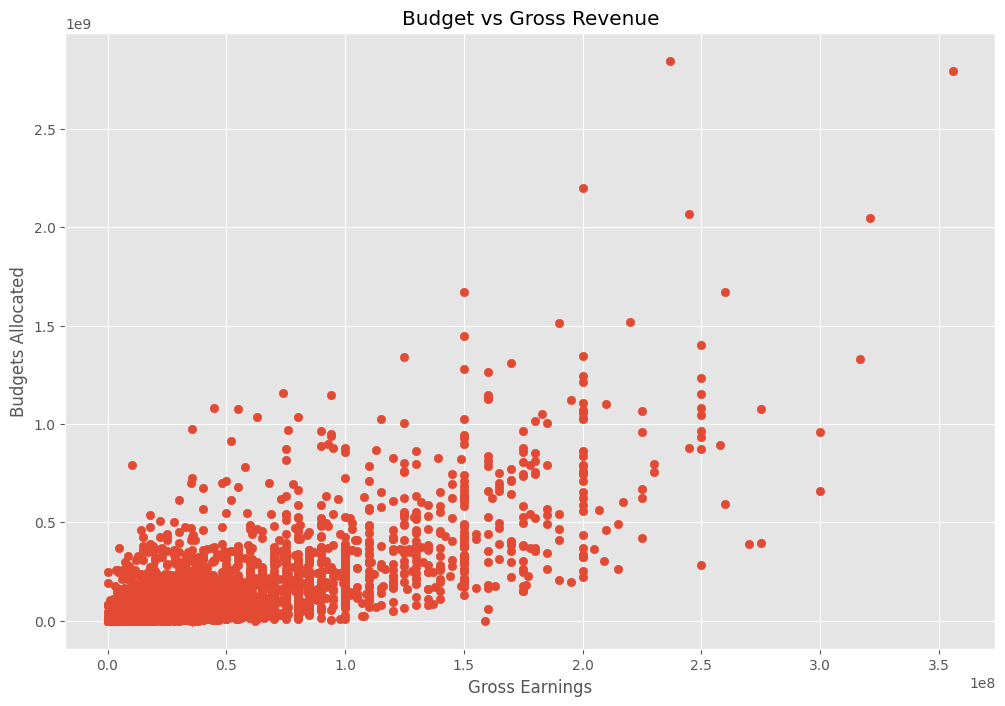

In [13]:
# Vizualising a scatter plot with budget & gross

plt.scatter(x=movie_df['budget'], y=movie_df['gross_revenue'])

plt.title("Budget vs Gross Revenue")

plt.xlabel("Gross Earnings")

plt.ylabel("Budgets Allocated")

Its a bit difficult to derive the correlation from this scatter plot although a focused look sees the highest budget of 230,000,000 corresponding to a high revenue of 284,700,000.

A regression plot with seaborn would be utilized to better visualize the trend or direction of the correlation 

<Axes: xlabel='budget', ylabel='gross_revenue'>

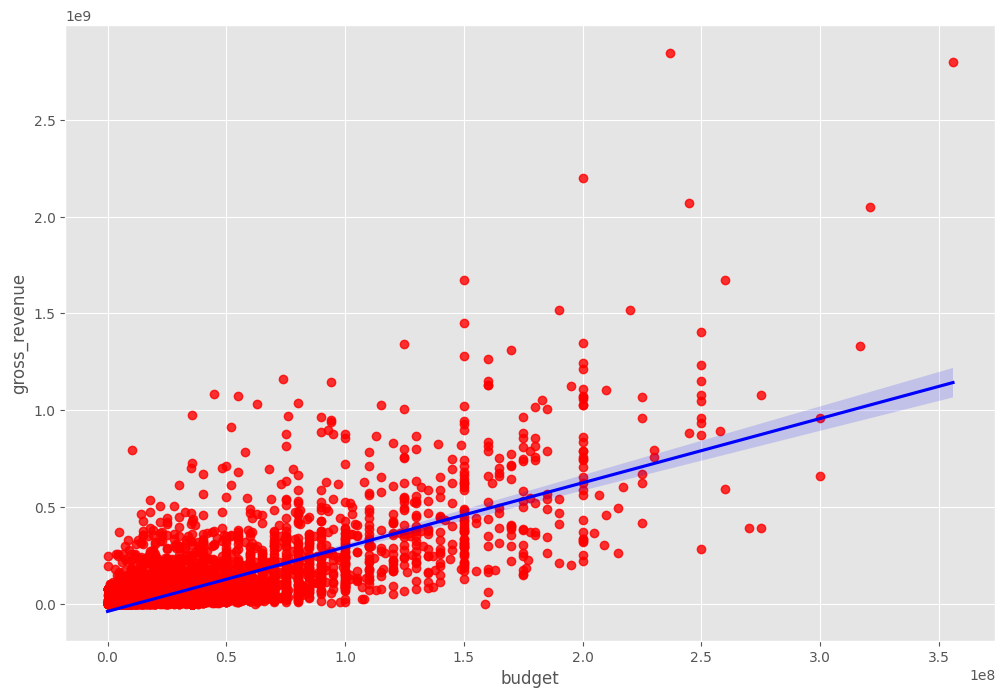

In [17]:
# Plotting budget vs gross using seaborn 

sns.regplot(x="budget", y="gross_revenue", data= movie_df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [29]:
# checking the entire correlation across numerical fields in the dataframe 

movie_df = movie_df[['budget','gross_revenue','year','score','votes','name','rating','genre',
                     'star','released','country','director','company','runtime','writer']]

corr_columns_numeric = movie_df.select_dtypes(include=['float64', 'int64'])

corr_columns_numeric.corr() # You can decide to use pearson, kendall or spearman. In this case, our focus is the default= Pearson

,budget,gross_revenue,year,score,votes,runtime
budget,1.000000,0.712495,0.268763,0.064656,0.421224,0.265921
gross_revenue,0.712495,1.000000,0.254292,0.185051,0.629225,0.241640
year,0.268763,0.254292,1.000000,0.102261,0.226650,0.120940
score,0.064656,0.185051,0.102261,1.000000,0.411855,0.400566
votes,0.421224,0.629225,0.226650,0.411855,1.000000,0.309370
runtime,0.265921,0.241640,0.120940,0.400566,0.309370,1.000000


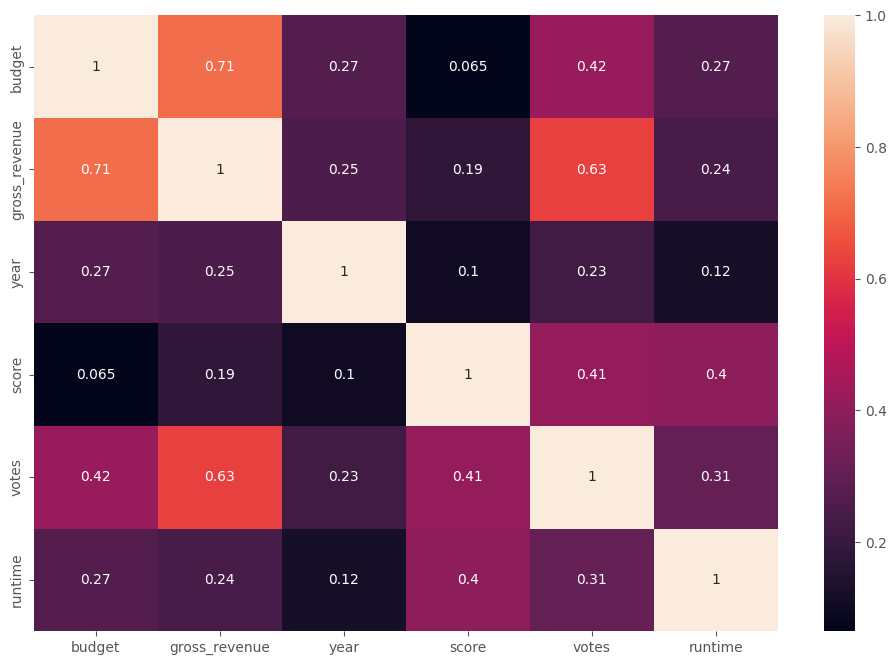

In [31]:
# Visualizing the correlation table 

correlation_matrix = corr_columns_numeric.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.show()

# Light squares represent high correlation while the darker squares represent little to no correlation.

### Relationship between Movie and Revenue

In [38]:
genre_split = movie_df["genre"].value_counts()

genre_split


genre
Comedy       2231
Action       1696
Drama        1478
Crime         544
Biography     439
Adventure     426
Animation     335
Horror        318
Fantasy        43
Mystery        20
Thriller       16
Family         10
Sci-Fi          9
Romance         8
Western         3
Musical         1
Sport           1
Music           1
Name: count, dtype: int64

In [58]:
#Grouping the data by genre to find the mean values of each feature i.e revenue, budget, votes etc.
grouped_genre = movie_df.groupby("genre")

agg_data_1 = grouped_genre.mean(numeric_only=True).sort_values(by=["gross_revenue"],ascending=True)

print(agg_data_1)

                 budget  gross_revenue         year     score          votes  \
genre                                                                          
Music      3.558988e+07   1.100140e+05  1981.000000  7.200000   12000.000000   
Sport      3.558988e+07   1.067629e+06  2019.000000  5.900000     691.000000   
Musical    3.558988e+07   2.217255e+06  2019.000000  7.900000     321.000000   
Western    1.886329e+07   1.067530e+07  1985.333333  5.666667    2066.333333   
Romance    2.837120e+07   2.354937e+07  1996.875000  6.500000   44596.750000   
Sci-Fi     2.540886e+07   3.766560e+07  1992.000000  6.266667   98307.222222   
Thriller   2.148307e+07   3.982658e+07  1993.875000  5.912500   19930.687500   
Drama      2.821936e+07   4.015565e+07  2000.342355  6.695193   71136.618145   
Fantasy    1.807860e+07   4.016434e+07  1996.116279  6.048837   59509.302326   
Crime      2.579012e+07   4.033589e+07  1999.744485  6.673529   91747.132353   
Comedy     2.681810e+07   4.523951e+07  

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Sport'),
  Text(2, 0, 'Musical'),
  Text(3, 0, 'Western'),
  Text(4, 0, 'Romance'),
  Text(5, 0, 'Sci-Fi'),
  Text(6, 0, 'Thriller'),
  Text(7, 0, 'Drama'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'Crime'),
  Text(10, 0, 'Comedy'),
  Text(11, 0, 'Biography'),
  Text(12, 0, 'Horror'),
  Text(13, 0, 'Mystery'),
  Text(14, 0, 'Adventure'),
  Text(15, 0, 'Action'),
  Text(16, 0, 'Family'),
  Text(17, 0, 'Animation')])

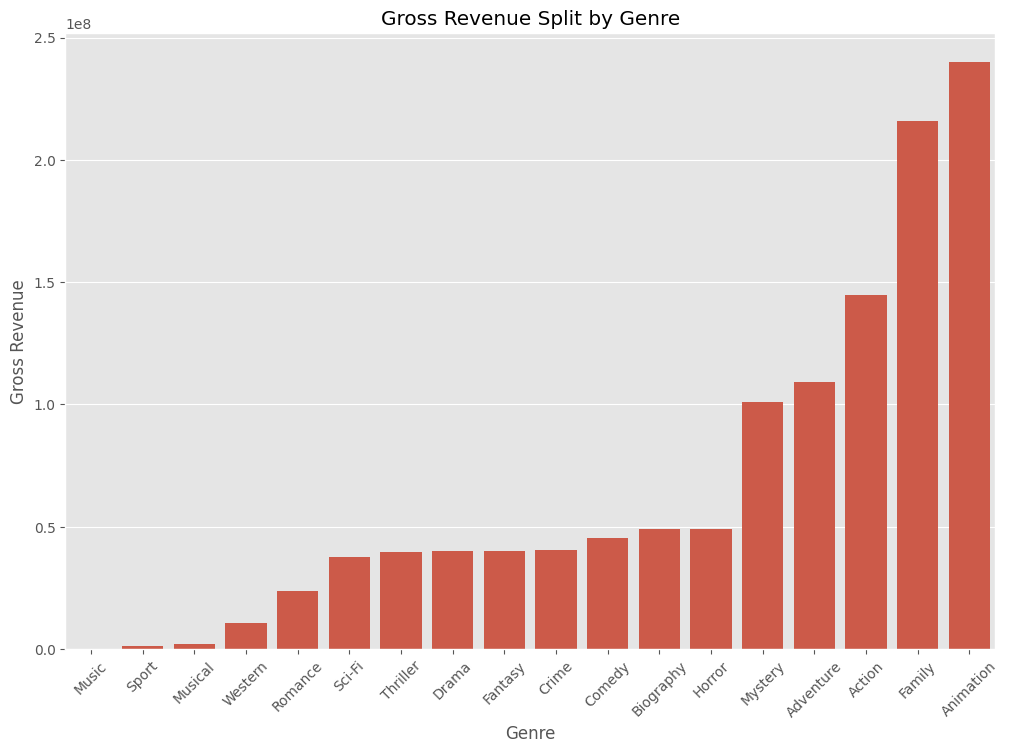

In [59]:

sns.barplot(data=agg_data_1, x="genre", y="gross_revenue")
plt.title("Gross Revenue Split by Genre")
plt.xlabel("Genre")
plt.ylabel("Gross Revenue")
plt.xticks(rotation=45)

From the above plot, the "ANIMATION" category corresponds to the highest generated revenue split amongst all films, meaning films that are targeted at a younger demographic make more money!

### Relationship between Years and Revenue

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 [Text(0, 0, '1980'),
  Text(1, 0, '1981'),
  Text(2, 0, '1982'),
  Text(3, 0, '1983'),
  Text(4, 0, '1984'),
  Text(5, 0, '1985'),
  Text(6, 0, '1986'),
  Text(7, 0, '1987'),
  Text(8, 0, '1988'),
  Text(9, 0, '1989'),
  Text(10, 0, '1990'),
  Text(11, 0, '1991'),
  Text(12, 0, '1992'),
  Text(13, 0, '1993'),
  Text(14, 0, '1994'),
  Text(15, 0, '1995'),
  Text(16, 0, '1996'),
  Text(17, 0, '1997'),
  Text(18, 0, '1998'),
  Text(19, 0, '1999'),
  Text(20, 0, '2000'),
  Text(21, 0, '2001'),
  Text(22, 0, '2002'),
  Text(23, 0, '2003'),
  Text(24, 0, '2004'),
  Text(25, 0, '2005'),
  Text(26, 0, '2006'),
  Text(27, 0, '2007'),
  Text(28, 0, '2008'),
  Text(29, 0, '2009'),
  Text(30, 0, '2010'),
  Text(31, 0, '2011'),
  Text(32, 0, '2012'),
  Text(33, 0, 

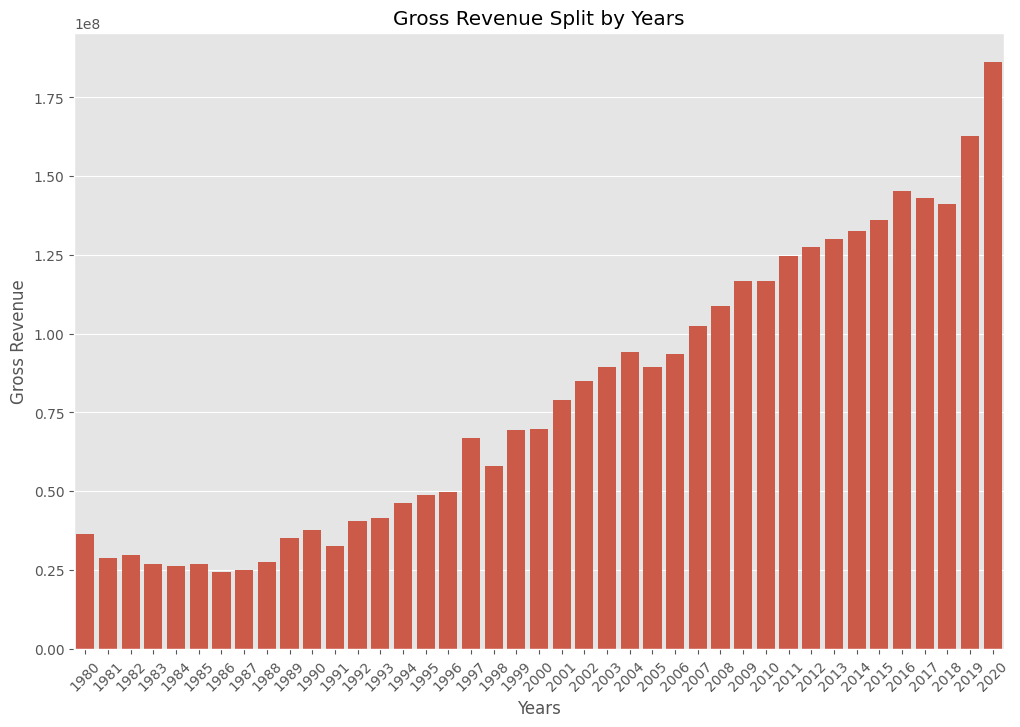

In [53]:
#Grouping the data by year to find the mean values of each feature i.e revenue, budget, votes etc.

grouped_year = movie_df.groupby("year")

agg_data_2 = grouped_year.mean(numeric_only=True).sort_values(by=["gross_revenue"],ascending=True)

sns.barplot(data=agg_data_2, x="year", y="gross_revenue")
plt.title("Gross Revenue Split by Years")
plt.xlabel("Years")
plt.ylabel("Gross Revenue")
plt.xticks(rotation=45)

### Relationship between Movie Cast and Revenue

In [62]:
#Grouping the data by Stars to find the mean values of each feature i.e revenue, budget, votes etc.

grouped_year = movie_df.groupby("star")

agg_data_3 = grouped_year.mean(numeric_only=True).sort_values(by=["gross_revenue"],ascending=False)

print(agg_data_3.head())

                      budget  gross_revenue         year     score     votes  \
star                                                                           
Donald Glover    260000000.0   1.670728e+09  2019.000000  6.900000  222000.0   
Daisy Ridley     212250000.0   1.120174e+09  2017.250000  6.975000  464875.0   
Neel Sethi       175000000.0   9.665549e+08  2016.000000  7.400000  264000.0   
Craig T. Nelson  146000000.0   9.381233e+08  2011.000000  7.800000  468000.0   
Chris Pratt      141500000.0   8.797427e+08  2016.166667  7.183333  492500.0   

                    runtime  
star                         
Donald Glover    118.000000  
Daisy Ridley     134.250000  
Neel Sethi       106.000000  
Craig T. Nelson  116.500000  
Chris Pratt      119.333333  


### Relationship between Country and Revenue

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58],
 [Text(0, 0, 'Federal Republic of Yugoslavia'),
  Text(1, 0, 'Serbia'),
  Text(2, 0, 'Republic of Macedonia'),
  Text(3, 0, 'Philippines'),
  Text(4, 0, 'Iceland'),
  Text(5, 0, 'Portugal'),
  Text(6, 0, 'Switzerland'),
  Text(7, 0, 'Kenya'),
  Text(8, 0, 'Vietnam'),
  Text(9, 0, 'Turkey'),
  Text(10, 0, 'Panama'),
  Text(11, 0, 'Belgium'),
  Text(12, 0, 'Norway'),
  Text(13, 0, 'Indonesia'),
  Text(14, 0, 'West Germany'),
  Text(15, 0, 'Thailand'),
  Text(16, 0, 'Jamaica'),
  Text(17, 0, 'Romania'),
  Text(18, 0, 'Aruba'),
  Text(19, 0, 'Denmark'),
  Text(20, 0, 'Colombia'),
  Text(21, 0, 'Sweden'),
  Text(22, 0, 'Russia'),
  Text(23, 0, 'Brazil'

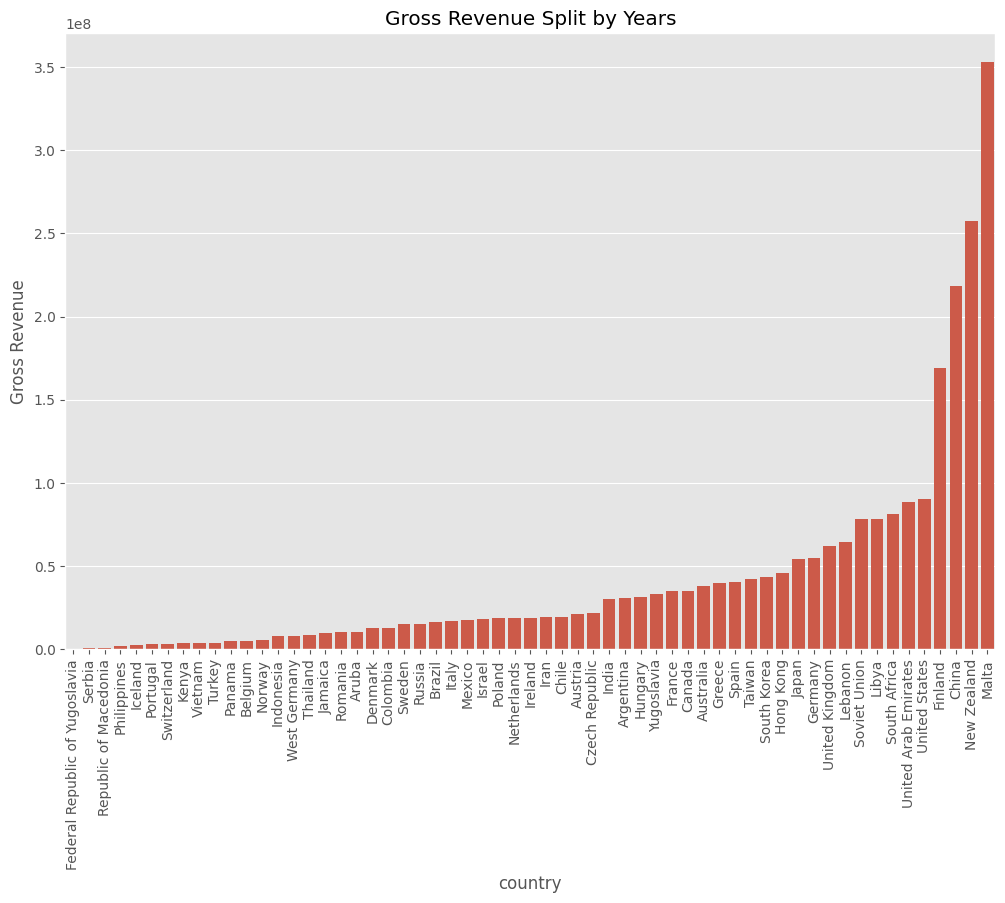

In [64]:
#Grouping the data by country to find the mean values of each feature i.e revenue, budget, votes etc.

grouped_year = movie_df.groupby("country")

agg_data_2 = grouped_year.mean(numeric_only=True).sort_values(by=["gross_revenue"],ascending=True)

sns.barplot(data=agg_data_2, x="country", y="gross_revenue")
plt.title("Gross Revenue Split by Years")
plt.xlabel("country")
plt.ylabel("Gross Revenue")
plt.xticks(rotation=90)